Student: Duncan Ferguson <br>
Student Id: 871641260 <br>
Class: Comp 4431-1 <br>
Assignment: Exercise 6 <br>
Date: 10/22/2021 <br>
Group: Name: Broken Toe <br>
Group Members: Emma Bright, Mike Santoro <br>

In [113]:
# Importing Libraries

import pandas as pd
import random
import numpy as np
import graphviz
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import export_graphviz

GPA's are assigned randomly inbetween a scale of 1 and 4

In [114]:
# Setting Random Seed
random.seed(50)

# Creating a list of 12 Random GPAS
GPA = [round(random.uniform(1, 4), 2) for _ in range(12)]  # Creating List of Random GPA
GPA_testing = [round(random.uniform(1, 4), 2) for _ in range(12)]
print("GPA's", GPA)
print("GPA's Testing", GPA_testing)

GPA's [2.49, 1.8, 2.91, 1.73, 2.42, 3.91, 1.26, 1.95, 3.03, 1.26, 1.46, 3.48]
GPA's Testing [3.94, 1.96, 1.57, 3.92, 1.99, 2.81, 2.82, 2.9, 3.75, 3.89, 3.08, 3.47]


Rankings are assigned on tier basis. Within those tiers there is some variability <br>
-If the GPA is above 3.5 the student is in the top 90-100% <br>
-If the GPA is above 3.0 but below 3.5 the student is in the top 80-90% <br>
-If the GPA is above 2.5 but below 3 the student is in the top 70-80% <br>
-If the GPA is above 2.0 but below 2.5 the student is in the top 60-70% <br>
-If the GPA is below 2.0 the student is in the bottom 0-60% <br>

In [115]:
def get_rankings(GPA):
    """This Function Randomizes rankings with weights"""
    RANK = []
    for grade in GPA:
        if grade > 3.5:
            RANK.append(round(random.uniform(.9, 1), 2))
        elif grade > 3:
            RANK.append(round(random.uniform(.8, .9), 2))
        elif grade > 2.5:
            RANK.append(round(random.uniform(.7, .8), 2))
        elif grade > 2:
            RANK.append(round(random.uniform(.6, .7), 2))
        else:
            RANK.append(round(random.uniform(0, .6), 2))
    return RANK

RANK = get_rankings(GPA)
RANK_testing = get_rankings(GPA_testing)

print("Rankings", RANK)
print("Ranking Testing", RANK_testing)

Rankings [0.68, 0.39, 0.74, 0.14, 0.63, 0.99, 0.42, 0.06, 0.89, 0.16, 0.42, 0.85]
Ranking Testing [0.93, 0.13, 0.35, 0.94, 0.37, 0.77, 0.78, 0.79, 0.96, 1.0, 0.85, 0.89]


For assigning working values. 1 indicates that the student did work, 0 indicates the student did not. <br>
-If the students GPA is above 2.0, there is a random 0-70 value assigned. If that value is above 50 they did work. <br>
-If the students GPA is below 2.0, there is a random 30-100 value assigned. If that value is above 50 they did work.

In [116]:
# Setting up Random Work 0 did not work 1 did, Scaling it toward working have lower GPA
def get_working(GPA):
    """Determining if they worked based off of GPA, with some randomness"""
    WORKED = []
    for num in enumerate(GPA):
        if num[1] > 2:
            rand_work = random.randint(0, 70)
            if rand_work > 50:
                WORKED.append(1)
            else:
                WORKED.append(0)
        else:
            if random.randint(30, 100) > 50:
                WORKED.append(1)
            else:
                WORKED.append(0)
    return  WORKED

WORKED = get_working(GPA)
WORKED_testing = get_working(GPA_testing)
print("Worked", WORKED)
print("Worked Testing", WORKED_testing)

Worked [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Worked Testing [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Compressing the GPA, RANKING and WORKED into a list

In [117]:
def compress_list(GPA, RANK, WORKED):
    """Compressing the lists"""
    list_o_list = []
    for num in range(len(GPA)):
        list_o_list.append([GPA[num], RANK[num], WORKED[num]])
    return list_o_list

list_o_list = compress_list(GPA, RANK, WORKED)
list_o_training = compress_list(GPA_testing, RANK_testing, WORKED_testing)
print("List_o_list", list_o_list)
print("List_o_training", list_o_training)

List_o_list [[2.49, 0.68, 1], [1.8, 0.39, 0], [2.91, 0.74, 1], [1.73, 0.14, 1], [2.42, 0.63, 0], [3.91, 0.99, 0], [1.26, 0.42, 1], [1.95, 0.06, 1], [3.03, 0.89, 0], [1.26, 0.16, 0], [1.46, 0.42, 1], [3.48, 0.85, 0]]
List_o_training [[3.94, 0.93, 1], [1.96, 0.13, 1], [1.57, 0.35, 1], [3.92, 0.94, 0], [1.99, 0.37, 0], [2.81, 0.77, 0], [2.82, 0.78, 0], [2.9, 0.79, 0], [3.75, 0.96, 0], [3.89, 1.0, 0], [3.08, 0.85, 0], [3.47, 0.89, 0]]


Graduating in 6 years is based on the sum of GPA, RANK and WORKED. <br>
If the sum of these three variables is above 2, They graduate with in 6 years <br>
Graduate Training is made so that we can see how well our decision tree works

In [118]:
def grad_in_6(list_o_list):
    """Creating a classifier if they graduate in 6 years """
    graduate = []
    for person in enumerate(list_o_list):
        if sum(person[1]) > 2:
            graduate.append(1)
        else:
            graduate.append(0)
    return graduate

graduate = grad_in_6(list_o_list)
graduate_training = grad_in_6(list_o_training)

print('Graduate', graduate)
print('Graduate Training', graduate_training)

Graduate [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
Graduate Training [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


First Example

In [119]:
X = list_o_list
Y = graduate

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)
print(type(clf))
print(clf)

foo = clf.predict_proba(list_o_training)

print("output of classifying 4 new items (should be): ", graduate_training)
foo = pd.DataFrame(data=foo, columns=["Something","Graduate"])
predict_graduating = foo["Graduate"].to_list()
predict_graduating = [int(i) for i in predict_graduating]
print(predict_graduating)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier()
output of classifying 4 new items (should be):  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Second Example


In [120]:
Xnum = list_o_list
classifications = graduate
clf2 = tree.DecisionTreeClassifier(criterion="entropy")
clf2 = clf2.fit(Xnum,classifications)
print(type(clf2))
print(clf2)

print("\nNow 'predicting class' of the first 6 elements of the training data.")
testData = list_o_training
foo = clf2.predict_proba( testData )
print("test data = " + str(testData))
print("data are classified as:")
print(foo)

treeStruct = export_text(clf2)
print("\nNow printing export_text(clf2)")
print(treeStruct)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier(criterion='entropy')

Now 'predicting class' of the first 6 elements of the training data.
test data = [[3.94, 0.93, 1], [1.96, 0.13, 1], [1.57, 0.35, 1], [3.92, 0.94, 0], [1.99, 0.37, 0], [2.81, 0.77, 0], [2.82, 0.78, 0], [2.9, 0.79, 0], [3.75, 0.96, 0], [3.89, 1.0, 0], [3.08, 0.85, 0], [3.47, 0.89, 0]]
data are classified as:
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]

Now printing export_text(clf2)
|--- feature_0 <= 1.36
|   |--- feature_1 <= 0.29
|   |   |--- class: 0
|   |--- feature_1 >  0.29
|   |   |--- class: 1
|--- feature_0 >  1.36
|   |--- class: 1



clf2.apply( Xnum ):
[4 4 4 4 4 4 3 4 4 2 4 4]

Now printing each tuple with the decision tree node it ends up in:
[2.49, 0.68, 1],4
[1.8, 0.39, 0],4
[2.91, 0.74, 1],4
[1.73, 0.14, 1],4
[2.42, 0.63, 0],4
[3.91, 0.99, 0],4
[1.26, 0.42, 1],3
[1.95, 0.06, 1],4
[3.03, 0.89, 0],4
[1.26, 0.16, 0],2
[1.46, 0.42, 1],4
[3.48, 0.85, 0],4


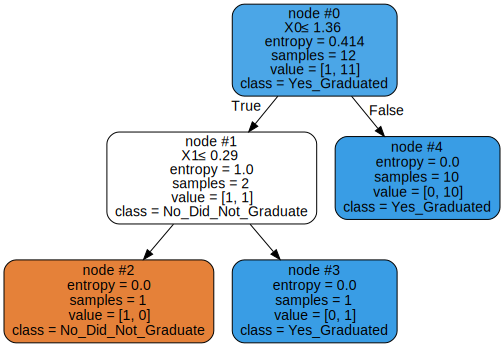

In [121]:
foo = clf2.apply( Xnum )   # passing in full list of training tuples
print("clf2.apply( Xnum ):")
print(foo)
# now print out line by line as pair:  tuple, which leaf node
print("\nNow printing each tuple with the decision tree node it ends up in:")
for i in range(len(foo)):
    print(str(Xnum[i]) + "," + str(foo[i]))

# NOTE - adding in node_ids and class_names as options to make tree viz more robust
dot_data = tree.export_graphviz(clf2, node_ids="true",class_names=('No_Did_Not_Graduate','Yes_Graduated'),out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

graph

Example 3 Creating a tree with "gini" instead of entropy

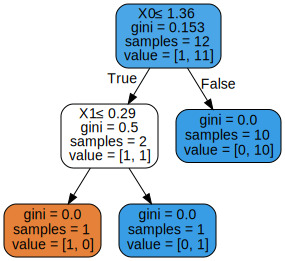

In [122]:
clf3 = tree.DecisionTreeClassifier(criterion="gini")
clf3 = clf3.fit(Xnum,classifications)
dotData3 = tree.export_graphviz(clf3, out_file=None, filled=True, rounded=True, special_characters=True)
foo = clf3.predict_proba( Xnum )

graph = graphviz.Source(dotData3)
graph





